## Census Income Project

Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

The prediction task is to determine whether a person makes over $50K a year.

Dataset Link

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
census_income_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
census_income_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Observation:
            1. Label (i.e. "Income") contains classification data so this is a Classification 
               Problem.
            2. Binary Classification Problem
            3. To predict whether a person makes over $50K a year.

## Exploratory Data Analysis

In [3]:
census_income_df.shape

(32560, 15)

In [4]:
census_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
census_income_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Handle Null values

In [6]:
census_income_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
census_income_df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation:
            1. There are no NULL values

In [8]:
census_income_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Number of uniques values in each column

In [9]:
census_income_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [10]:
# check the value counts of each column

for i in census_income_df.columns:
    print(census_income_df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

Observation:
            1. There are '?' uniques values in the three columns 'Workclass', 'Occupation', 
               'Native_country'
            2. Need to handle '?' these values

## check for any records - which has '?'

In [11]:
census_income_df.loc[census_income_df['Workclass'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Observation:
            1. there are 1836 rows values in the column 'Workclass' have "?"

In [12]:
census_income_df.loc[census_income_df['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Observation:
            1. there are 1843 rows values in the column 'Occupation' have "?"

In [13]:
census_income_df.loc[census_income_df['Native_country'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


Observation:
            1. there are 583 rows values in the column 'Native_country' have "?"

## Handle " ?" values 

In [14]:
census_income_df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Observation:
            1. There are 1836 rows values in the column 'Workclass' have "?"
            2. There are 1843 rows values in the column 'Occupation' have "?"
            3. There are 583 rows values in the column 'Native_country' have "?"

In [15]:
census_income_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Observation:
            1. The columns 'Workclass', 'Occupation' and 'Native_country' are object type 
            2. First replace with NULL values and then replace all NULL values using mode 

In [16]:
census_income_df['Workclass'] = census_income_df['Workclass'].replace(' ?', np.nan)

census_income_df['Occupation'] = census_income_df['Occupation'].replace(' ?', np.nan)

census_income_df['Native_country'] = census_income_df['Native_country'].replace(' ?', np.nan)

In [17]:
census_income_df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation:
            1. In the columns 'Workclass', 'Occupation' and 'Native_country' - the ' ?' values are 
               replaced with NULL values

In [18]:
census_income_df.isnull().sum() 

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [19]:
census_income_df.loc[census_income_df['Workclass'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [20]:
census_income_df.loc[census_income_df['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [21]:
census_income_df.loc[census_income_df['Native_country'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [22]:
for i in ['Workclass', 'Occupation', 'Native_country']:
    print(census_income_df[i].value_counts() )
    print('\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England

In [23]:
census_income_df.isnull().sum()  

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [24]:
# Handle all features Null values - Object type

for i in ['Workclass', 'Occupation', 'Native_country']:
        census_income_df[i] = census_income_df[i].fillna(census_income_df[i].mode()[0])

In [25]:
census_income_df.isnull().sum() 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation:
            1. There are no NULL values

## check for any blank records

In [26]:
for i in census_income_df.columns:
    print(census_income_df.loc[census_income_df[i] == ' '])

Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []
Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week,

Observation:
            1. checked all 15 columns but none have any blank values

## check the duplicate values in rows

In [27]:
census_income_df.shape

(32560, 15)

In [28]:
census_income_df.duplicated().sum()

24

In [29]:
# remove 24 duplicate values in rows

census_income_df.drop_duplicates(ignore_index = True, inplace = True)

In [32]:
census_income_df.shape

(32536, 15)

Observation:
            1. 24 duplicate values in rows we found and so deleted 

In [33]:
census_income_df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [34]:
census_income_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data Visualization

In [35]:
census_income_df.shape

(32536, 15)

In [48]:
# seperating numerical and categorical columns

cat_col = []
for i in census_income_df.dtypes.index:
    if census_income_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in census_income_df.dtypes.index:
    if census_income_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical Column ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


Observations:
            1. There are 09 categorical columnms and 06 numerical columns

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


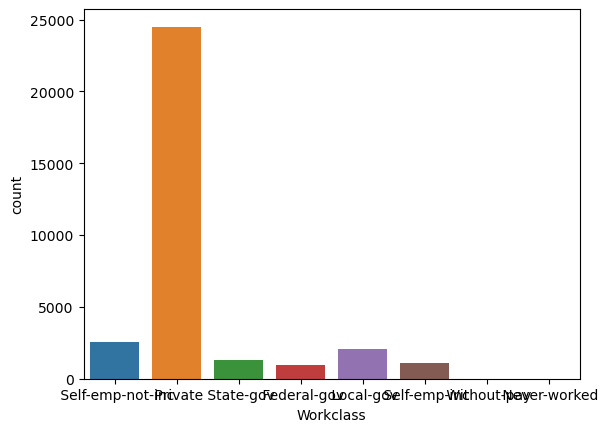

In [36]:
# Univariate Analysis

sns.countplot(x = 'Workclass', data = census_income_df)
print(census_income_df.Workclass.value_counts())

Observation:
            1. There are more number of  Private customers - 24509

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


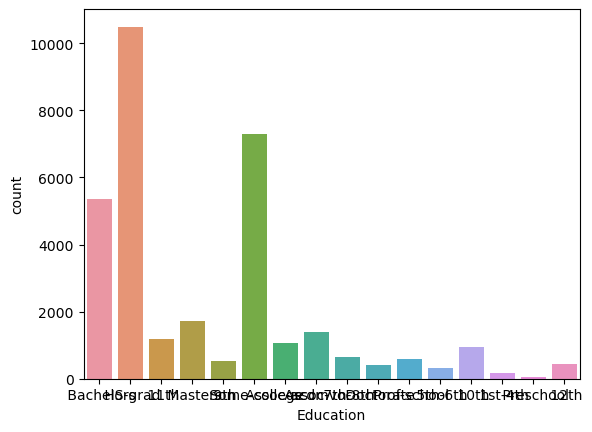

In [37]:
# Univariate Analysis

sns.countplot(x = 'Education', data = census_income_df)
print(census_income_df.Education.value_counts())

Observation:
            1. more number of customers are HS-grad - 10494

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


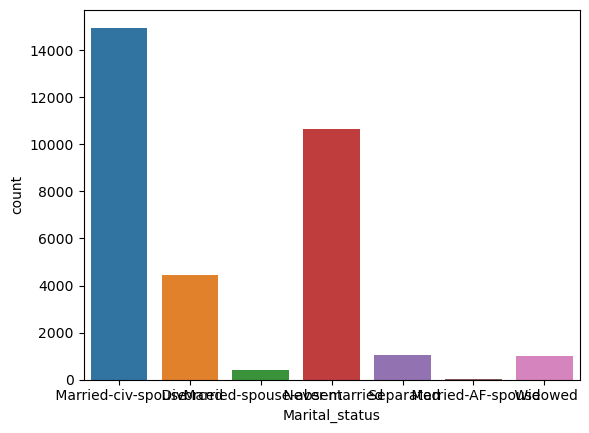

In [38]:
# Univariate Analysis

sns.countplot(x = 'Marital_status', data = census_income_df)
print(census_income_df.Marital_status.value_counts())

Observation:
            1. More number of customers Marital_status - Married-civ-spouse - 14970

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


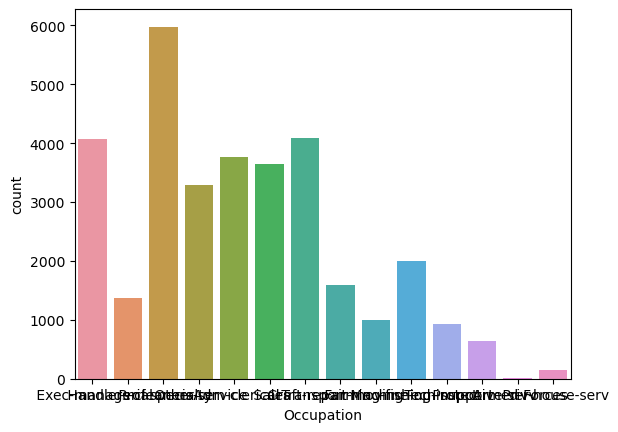

In [40]:
# Univariate Analysis

sns.countplot(x = 'Occupation', data = census_income_df)
print(census_income_df.Occupation.value_counts())

Observation:
            1. More number of customers Occupation are - Prof-specialty - 5979

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


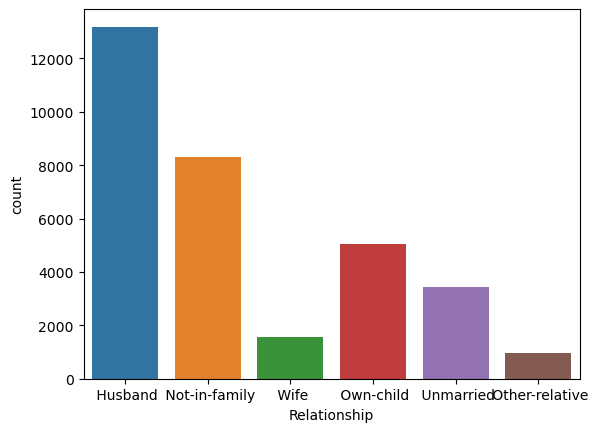

In [41]:
# Univariate Analysis

sns.countplot(x = 'Relationship', data = census_income_df)
print(census_income_df.Relationship.value_counts())

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


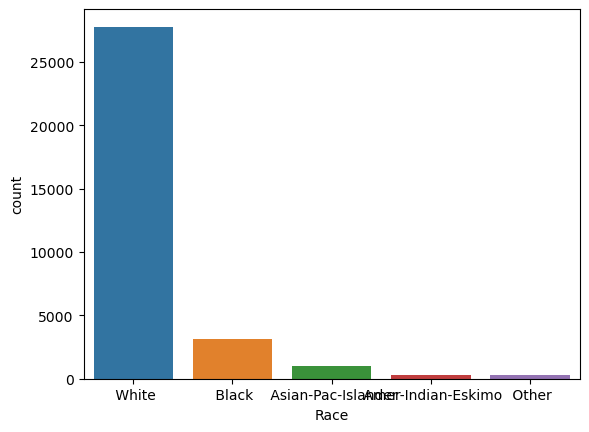

In [192]:
# Univariate Analysis 

sns.countplot(x = 'Race', data = census_income_df)
print(census_income_df.Race.value_counts())

Observation:
            1. More number of Race - White - 27794

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

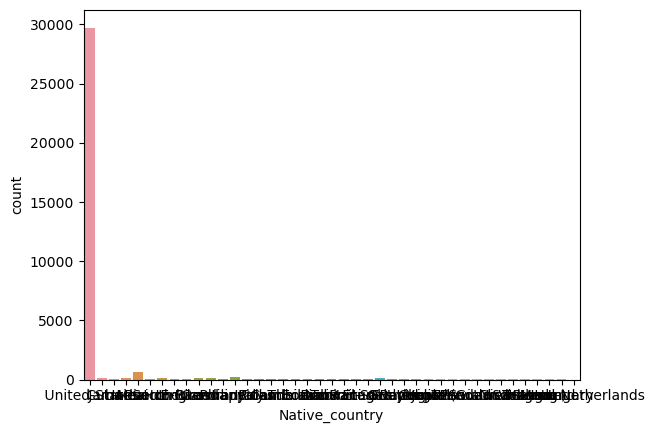

In [44]:
# Univariate Analysis

sns.countplot(x = 'Native_country', data = census_income_df)
print(census_income_df.Native_country.value_counts())

Observation:
            1. More number of customers are from United-States - 29734 

 Male      21774
 Female    10762
Name: Sex, dtype: int64


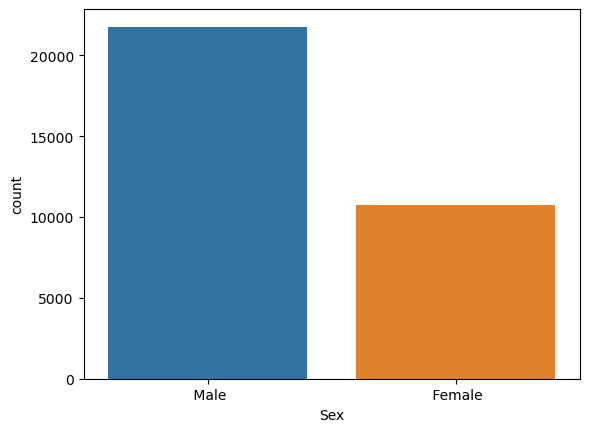

In [45]:
sns.countplot(x = 'Sex', data = census_income_df)
print(census_income_df.Sex.value_counts())

In [ ]:
Observation:
            1. More number of male customers - 21774

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


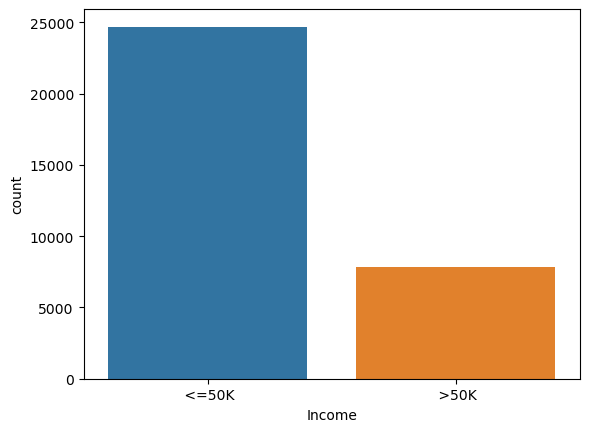

In [46]:
sns.countplot(x = 'Income', data = census_income_df)
print(census_income_df.Income.value_counts())

Observation:
            1. More number of customers are <=50K - 24697
            2. Data is imbalanced, need to do data balancing.

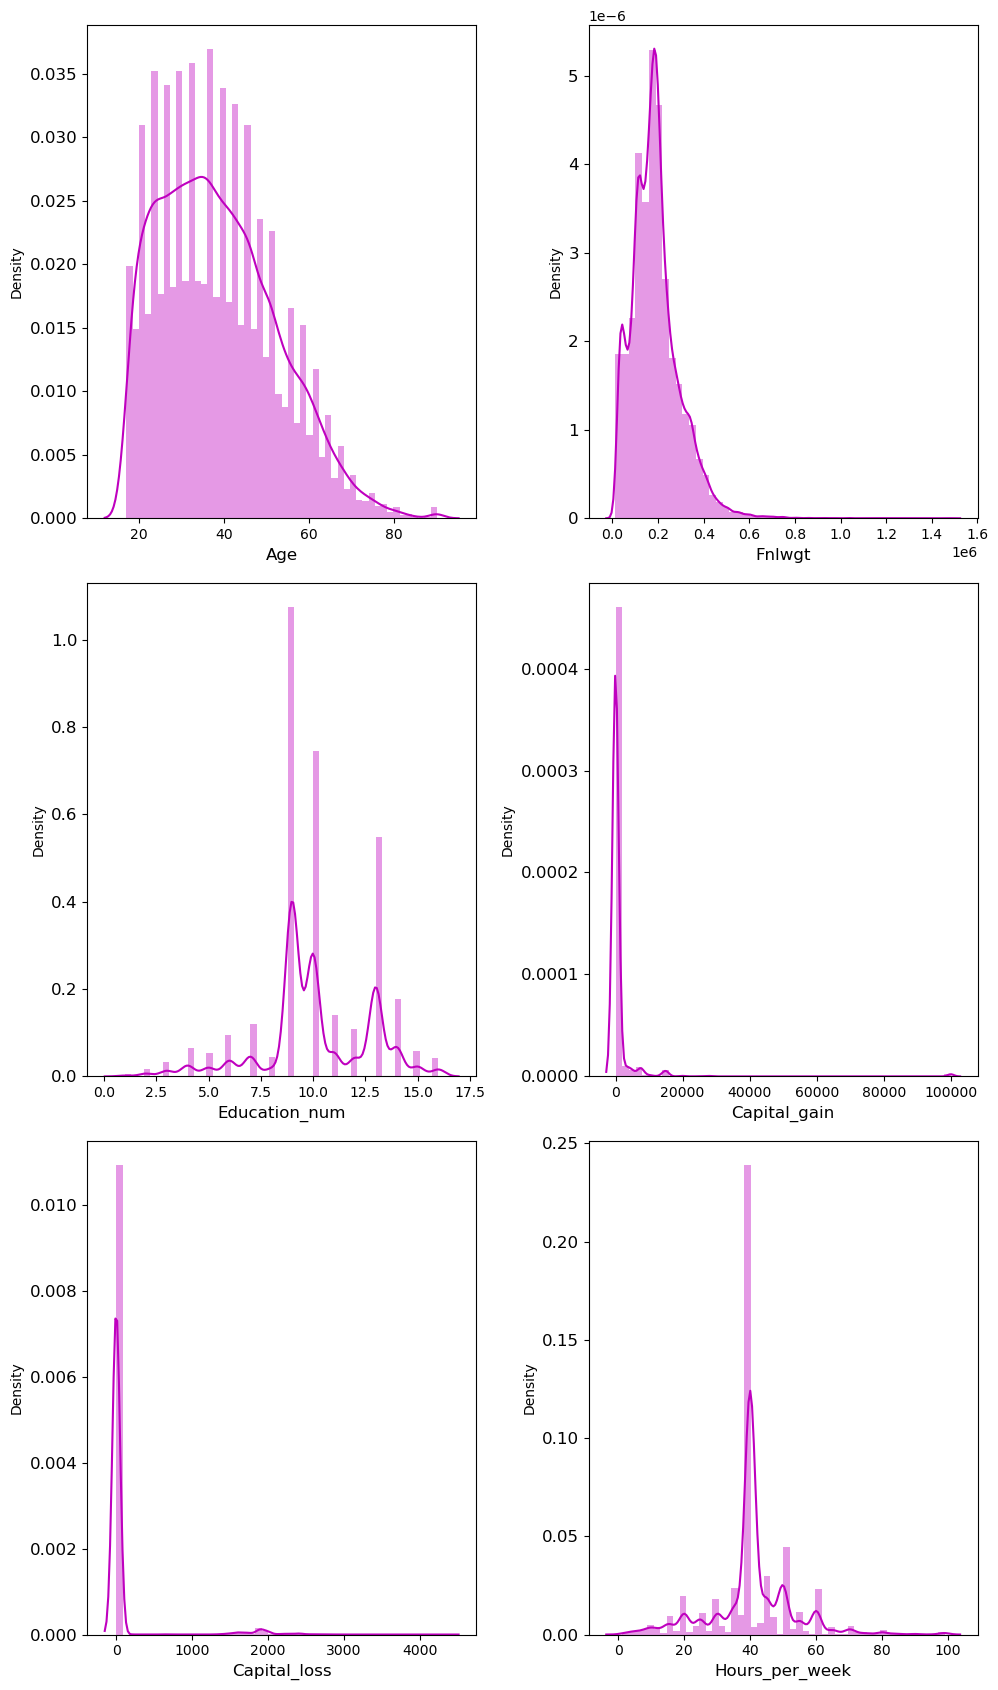

In [49]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10, 17))
p = 1
for i in num_col:
    if p <= 6:
        ax = plt.subplot(3, 2, p)
        sns.distplot(census_income_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data are not well normally distributed. 
            2. There are outliers
            3. We need to deal with skewness in the data 

In [50]:
census_income_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [51]:
census_income_df.shape

(32536, 15)

In [52]:
census_income_df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

## Feature Encoding

In [53]:
# Convert Object data type to int type

census_income_df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [54]:
census_income_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [55]:
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [56]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [57]:
for i in cat_col:
    census_income_df[i] = label_enc.fit_transform(census_income_df[i])

In [58]:
census_income_df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Observation:
            1. Converted all Object data type to int type

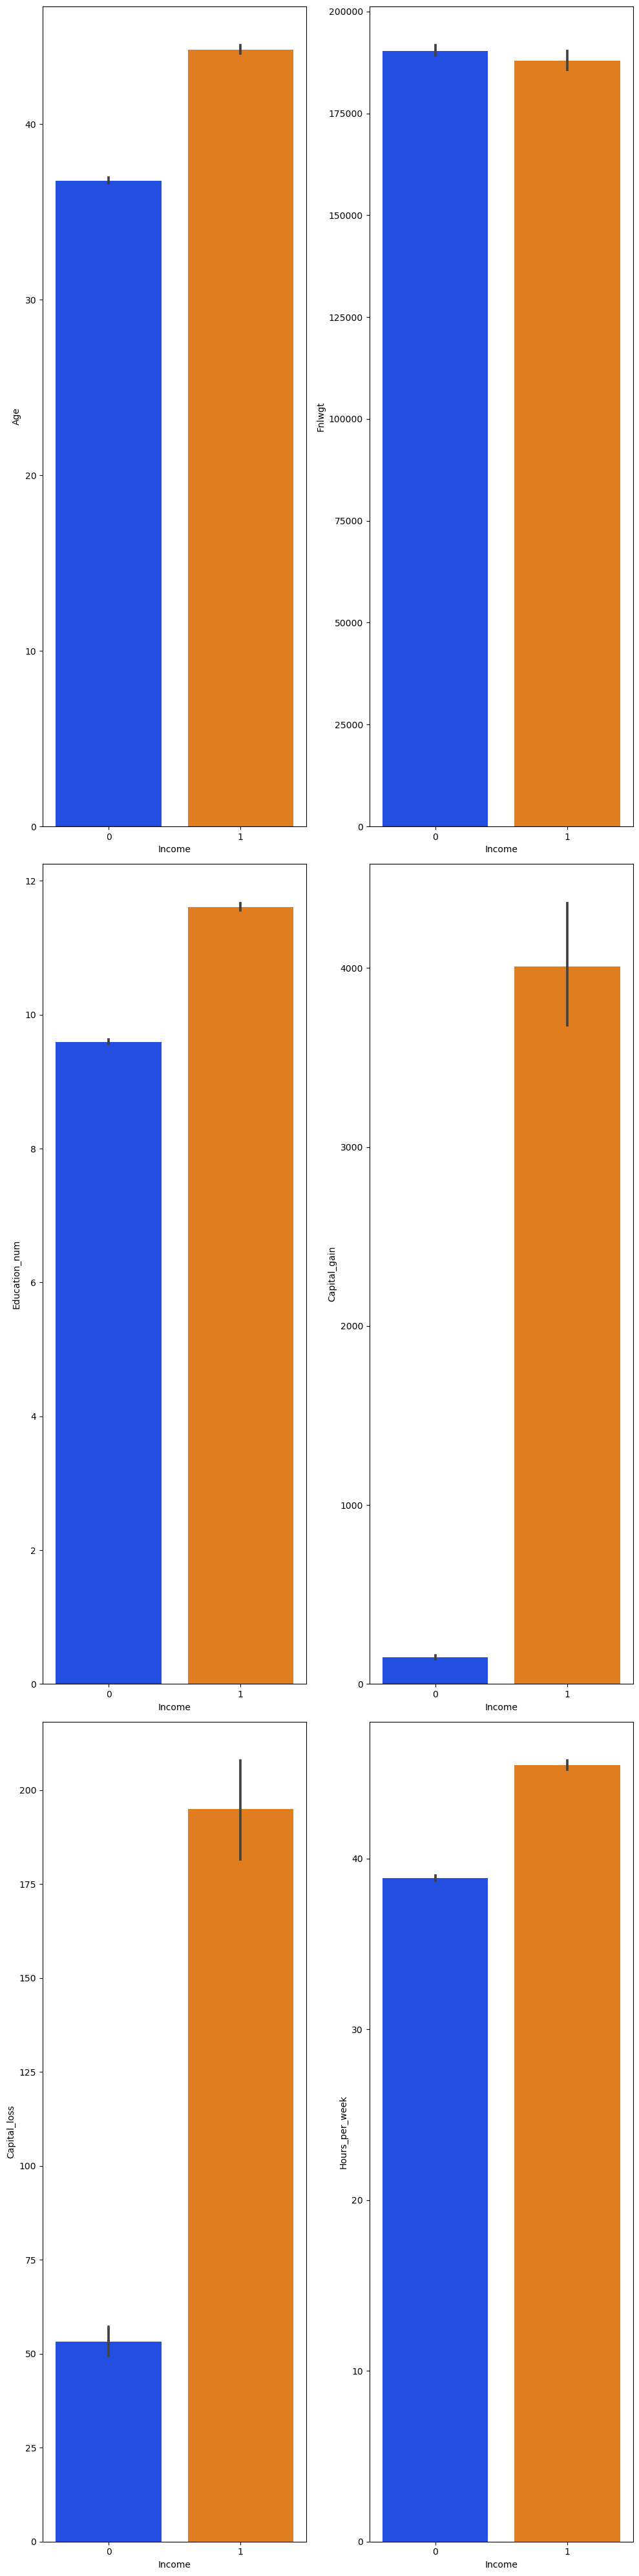

In [59]:
plt.figure(figsize = (10, 40))
p = 1
for i in num_col:
    if p <= 6:
        ax = plt.subplot(3, 2, p)
        sns.barplot(x = 'Income', y = census_income_df[i], data = census_income_df, palette = 'bright')
       
    p = p + 1
plt.tight_layout()

## Check for Multicollinearity

In [60]:
# get coefficient of one variable with all the other variables

cor = census_income_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


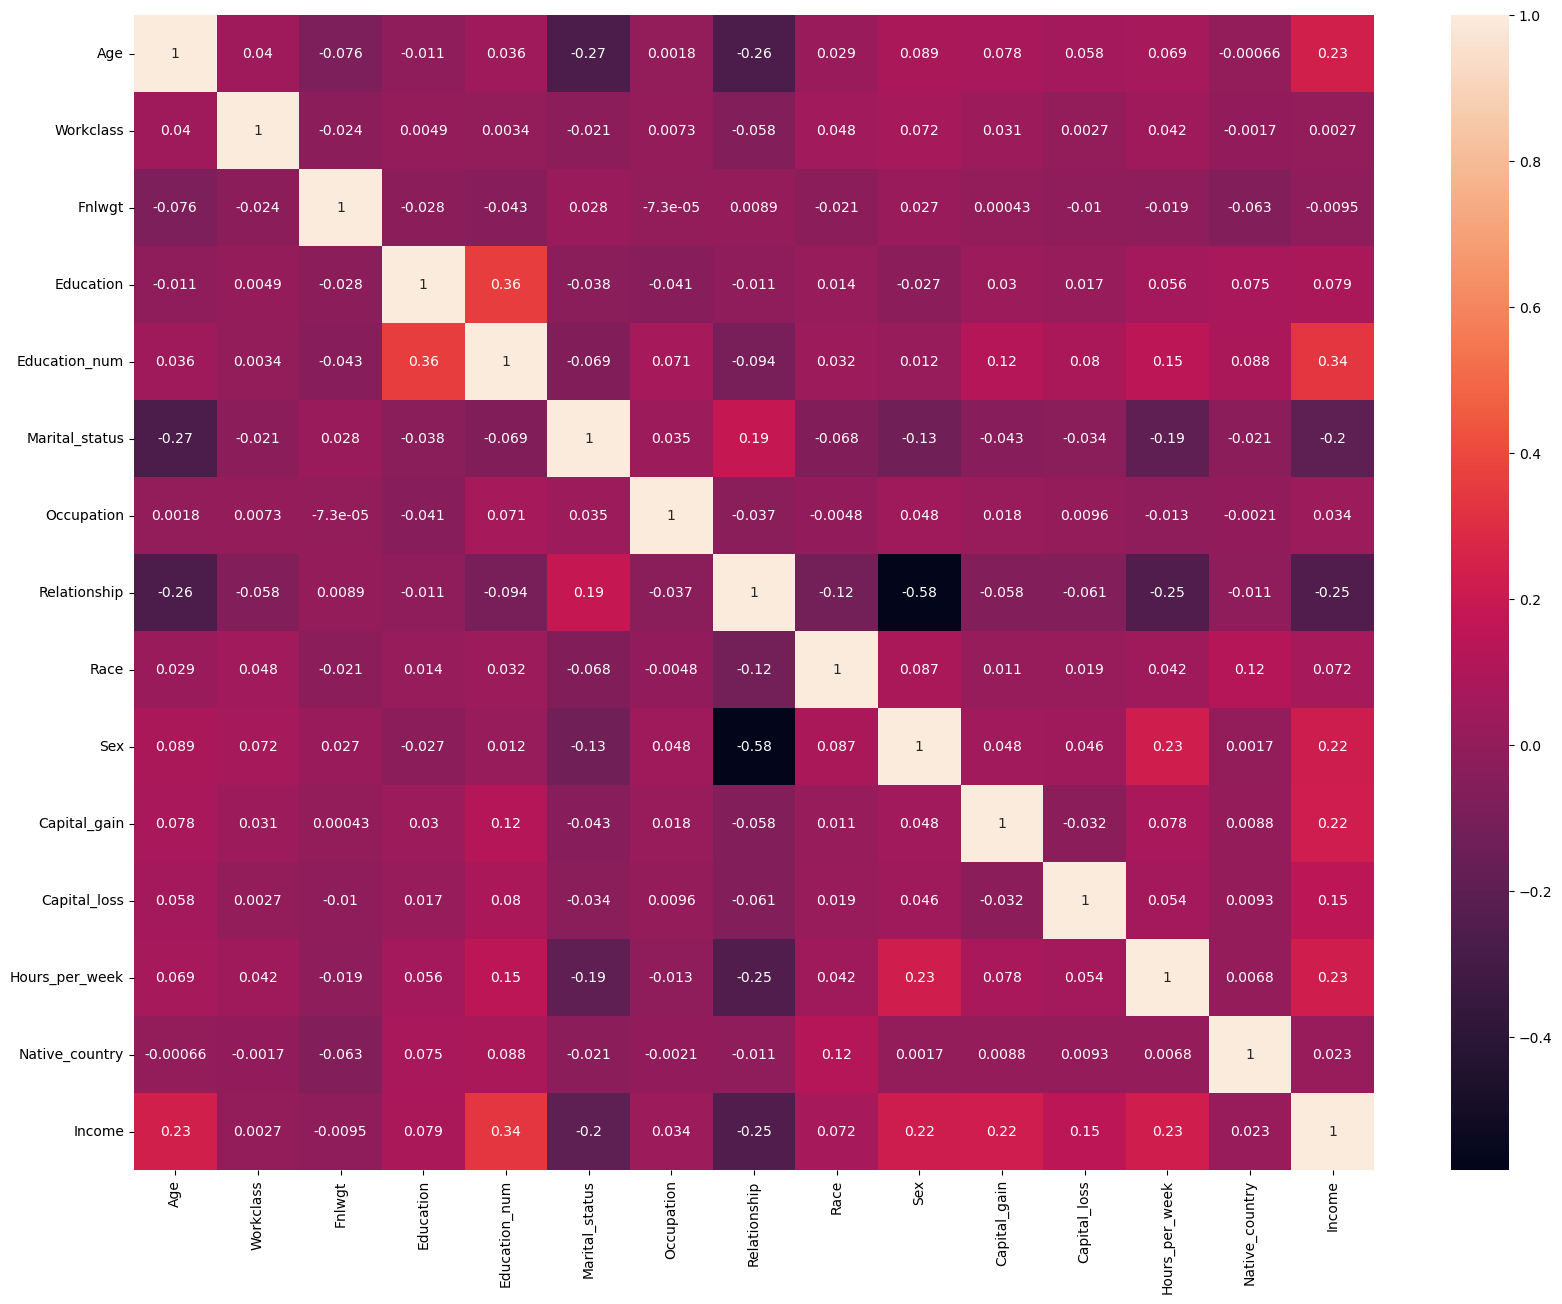

In [61]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. features are not positively correlated.

In [62]:
census_income_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [63]:
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

## Drop Column not needed

In [64]:
census_income_df['Education'].value_counts()

11    10494
15     7282
9      5352
12     1722
8      1382
1      1175
7      1067
0       933
5       645
14      576
6       514
2       433
10      413
4       332
3       166
13       50
Name: Education, dtype: int64

In [65]:
census_income_df['Education_num'].value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

In [66]:
# 'Education_num' and 'Education' column are almost same - So will remove any one column

census_income_df.drop(["Education_num"], axis = 1, inplace = True)
census_income_df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0


In [67]:
census_income_df.shape

(32536, 14)

## Checking Outliers

In [68]:
# we dont check outliers for labels and categorocal column so remove it

census_income_df_features = census_income_df.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income'], axis = 1)

In [69]:
census_income_df_features.head()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40


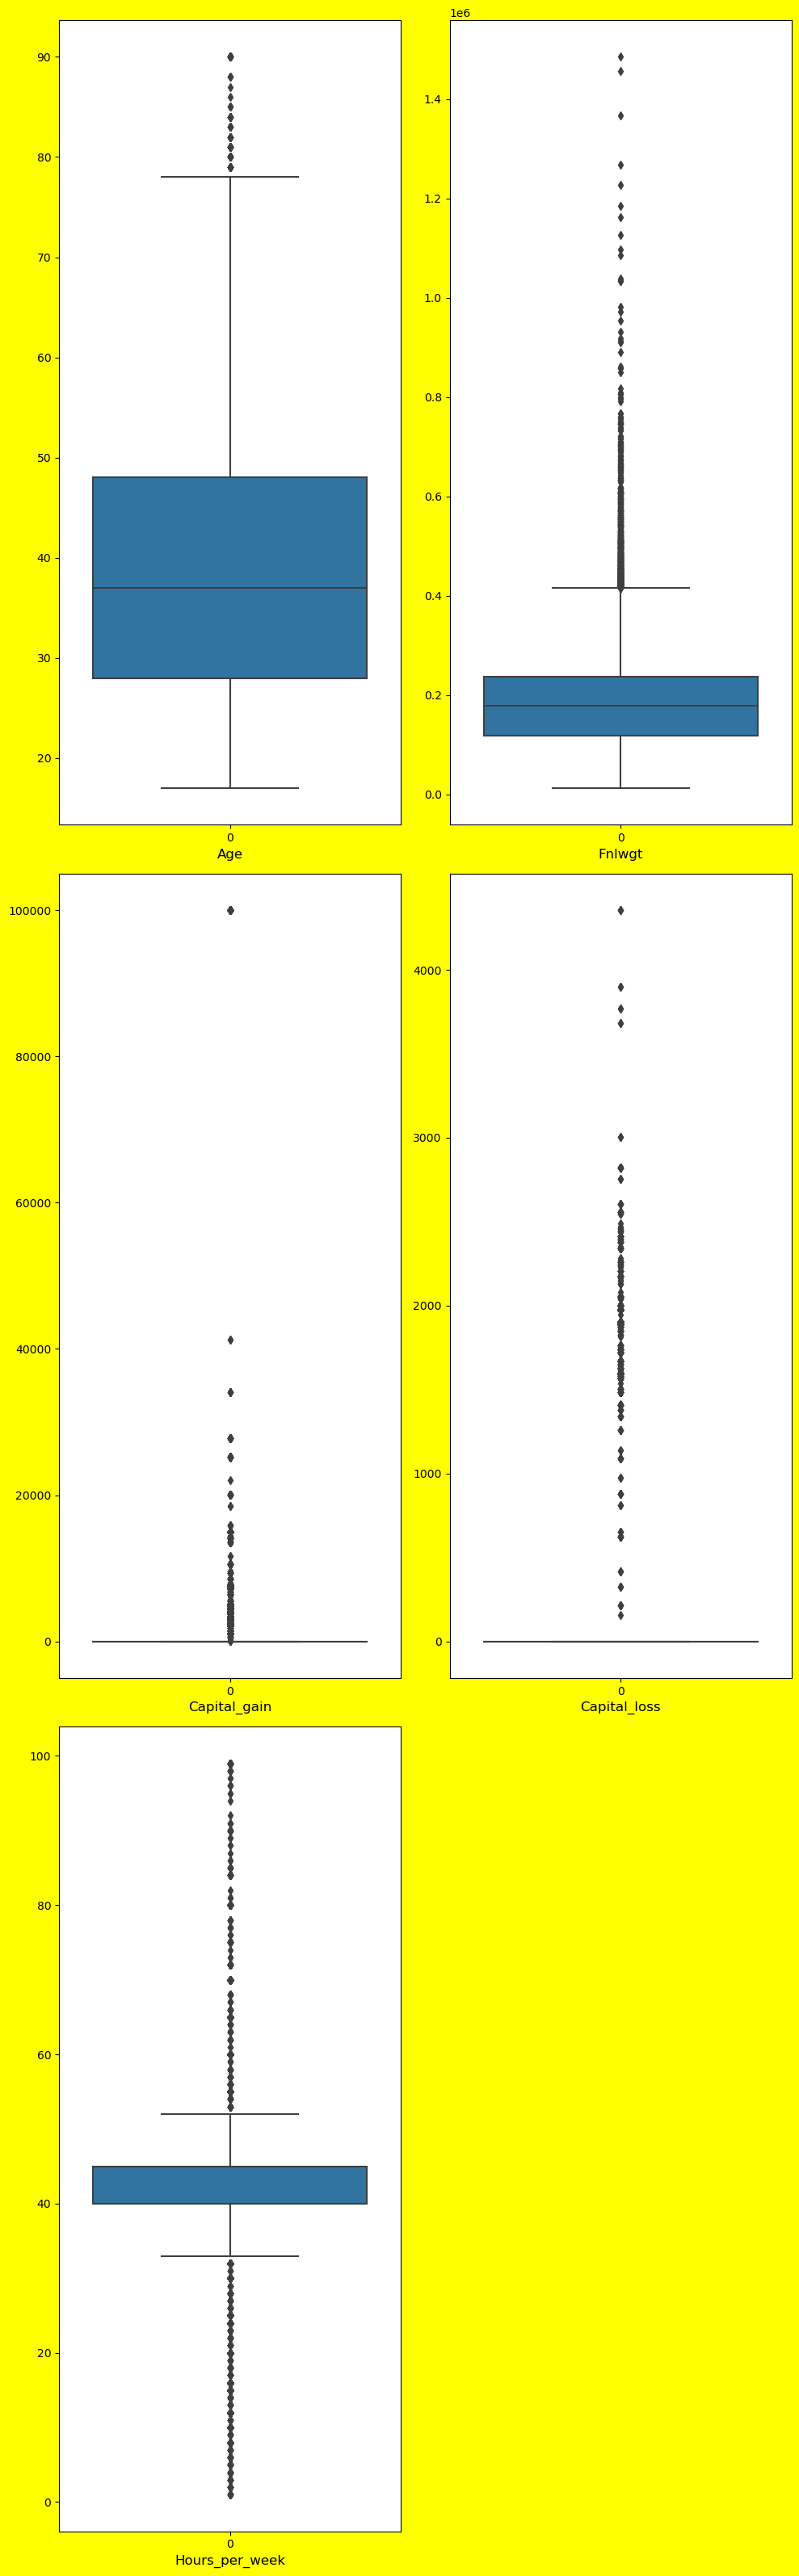

In [70]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,32), facecolor = 'yellow')
p = 1
for i in census_income_df_features:
    if p <= 6:
        ax = plt.subplot(3, 2, p)
        sns.boxplot(data = census_income_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in almost all numerical features. 
            2. Outliers are both left and right skewed (i.e. outliers are above max value and below 
                min value)
            2. Remove the outliers

In [71]:
census_income_df_features.columns

Index(['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], dtype='object')

## Find IQR to identify outliers and remove it

In [72]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = census_income_df.quantile(0.25)
q3 = census_income_df.quantile(0.75)
iqr = q3 - q1

In [73]:
# validating one outlier

Age_high = (q3['Age'] + (1.5 * iqr['Age']))
Age_high

# anything > 78.0 outliers

78.0

In [74]:
# check the index which have the higher values

np_index = np.where(census_income_df['Age'] > Age_high)
np_index

# remove these indexes as they are outliers

(array([   73,   221,   429,   917,  1039,  1167,  1934,  2302,  2753,
         2890,  2905,  3210,  3337,  3536,  3776,  3962,  4069,  4108,
         4719,  4833,  5269,  5288,  5367,  5403,  5997,  6170,  6211,
         6229,  6436,  6621,  6745,  7478,  7717,  7869,  8173,  8378,
         8428,  8519,  8691,  8803,  8960,  8970,  9467, 10120, 10206,
        10541, 11095, 11234, 11508, 11528, 11726, 11991, 12446, 12487,
        12825, 12970, 13020, 13021, 13289, 13690, 13922, 14098, 14153,
        14598, 14705, 14750, 14897, 15349, 15655, 15885, 16295, 16516,
        16755, 16894, 17601, 18029, 18133, 18264, 18269, 18405, 18551,
        18715, 18822, 19035, 19162, 19170, 19202, 19479, 19485, 19505,
        19679, 19737, 19818, 20239, 20411, 20453, 20472, 20473, 20600,
        20816, 20870, 20943, 21332, 21489, 21800, 21823, 22207, 22466,
        22879, 22882, 23443, 23884, 24011, 24027, 24222, 24264, 24379,
        24544, 25147, 25287, 25381, 25995, 26225, 26713, 27777, 28158,
      

In [75]:
census_income_df.shape

(32536, 14)

In [76]:
census_income_df = census_income_df.drop(census_income_df.index[np_index])

In [77]:
census_income_df.shape  

(32394, 14)

In [78]:
census_income_df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
32532,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
32533,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
32534,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


In [79]:
census_income_df.reset_index(inplace = True, drop = True)

In [80]:
census_income_df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32389,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
32390,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
32391,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
32392,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


In [81]:
# validating other outlier

Hours_per_week_high = (q3['Hours_per_week'] + (1.5 * iqr['Hours_per_week']))
Hours_per_week_high

# anything > 52.5 outliers

52.5

In [82]:
# check the index which have the higher values

np_index1 = np.where(census_income_df['Hours_per_week'] > Hours_per_week_high)
np_index1

# remove these indexes as they are outliers

(array([    9,    19,    26, ..., 32365, 32369, 32381], dtype=int64),)

In [83]:
census_income_df.shape

(32394, 14)

In [84]:
census_income_df = census_income_df.drop(census_income_df.index[np_index1])

In [85]:
census_income_df.shape

(28912, 14)

In [86]:
census_income_df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32389,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
32390,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
32391,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
32392,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


In [87]:
census_income_df.reset_index(inplace = True, drop = True)

In [88]:
census_income_df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28907,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
28908,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
28909,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
28910,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


Observations:
            1. We removed outliers from few columns

## Checking for Skewness

In [89]:
census_income_df.skew() # not in the range -0.5 to +0.5

Age                0.491680
Workclass          0.100823
Fnlwgt             1.469059
Education         -0.924604
Marital_status    -0.068222
Occupation        -0.004431
Relationship       0.697708
Race              -2.351740
Sex               -0.617429
Capital_gain      13.683474
Capital_loss       4.751173
Hours_per_week    -1.457397
Native_country    -4.210387
Income             1.351106
dtype: float64

In [90]:
# removing for skewness

census_income_df['Capital_gain'] = np.cbrt(census_income_df['Capital_gain'])

census_income_df['Capital_loss'] = np.cbrt(census_income_df['Capital_loss'])

census_income_df['Hours_per_week'] = np.cbrt(census_income_df['Hours_per_week'])

census_income_df['Fnlwgt'] = np.cbrt(census_income_df['Fnlwgt'])

In [91]:
census_income_df.skew() # not in the range -0.5 to +0.5

Age               0.491680
Workclass         0.100823
Fnlwgt           -0.159708
Education        -0.924604
Marital_status   -0.068222
Occupation       -0.004431
Relationship      0.697708
Race             -2.351740
Sex              -0.617429
Capital_gain      4.181949
Capital_loss      4.497470
Hours_per_week   -2.396669
Native_country   -4.210387
Income            1.351106
dtype: float64

Observation: 
            1. There are still skewness in the data

In [92]:
census_income_df.shape

(28912, 14)

## Another way to choose the best feature

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

In [94]:
# Seperate features and labels

x = census_income_df.drop('Income', axis = 1)
y = census_income_df.Income

In [95]:
x.shape

(28912, 13)

In [96]:
y.shape

(28912,)

In [97]:
y

0        0
1        0
2        0
3        0
4        0
        ..
28907    0
28908    1
28909    0
28910    0
28911    1
Name: Income, Length: 28912, dtype: int32

In [98]:
best_features = SelectKBest(score_func = f_classif, k = 10)

In [99]:
fit = best_features.fit(x, y)

In [100]:
df_scores = pd.DataFrame(fit.scores_)
df_scores

,0
0,1808.897132
1,2.160811
2,0.804651
3,155.150529
4,1183.018727
5,26.736949
6,1702.183912
7,144.690435
8,1275.496371
9,3085.562490


In [101]:
df_columns = pd.DataFrame(x.columns)
df_columns

,0
0,Age
1,Workclass
2,Fnlwgt
3,Education
4,Marital_status
5,Occupation
6,Relationship
7,Race
8,Sex
9,Capital_gain


In [102]:
# Concatenate DataFrames

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_Name', 'Score']

In [103]:
# prints 10 best features

feature_scores.nlargest(13, 'Score')  

,Feature_Name,Score
9,Capital_gain,3085.562490
0,Age,1808.897132
6,Relationship,1702.183912
8,Sex,1275.496371
4,Marital_status,1183.018727
11,Hours_per_week,1137.057234
10,Capital_loss,555.372677
3,Education,155.150529
7,Race,144.690435
5,Occupation,26.736949


In [104]:
# prints 10 best features
feature_scores.nlargest(10, 'Score') 

,Feature_Name,Score
9,Capital_gain,3085.562490
0,Age,1808.897132
6,Relationship,1702.183912
8,Sex,1275.496371
4,Marital_status,1183.018727
11,Hours_per_week,1137.057234
10,Capital_loss,555.372677
3,Education,155.150529
7,Race,144.690435
5,Occupation,26.736949


In [105]:
census_income_df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

## Seperating Features and Target

In [106]:
census_income_df.shape

(28912, 14)

In [107]:
new_x = census_income_df[['Capital_gain', 'Age', 'Relationship', 'Sex', 'Marital_status', 'Hours_per_week', 'Capital_loss', 'Education', 'Race', 'Occupation']]
new_x

,Capital_gain,Age,Relationship,Sex,Marital_status,Hours_per_week,Capital_loss,Education,Race,Occupation
0,0.000000,50,0,1,2,2.351335,0.0,9,4,3
1,0.000000,38,1,1,0,3.419952,0.0,11,4,5
2,0.000000,53,0,1,2,3.419952,0.0,1,2,5
3,0.000000,28,5,0,2,3.419952,0.0,9,2,9
4,0.000000,37,5,0,2,3.419952,0.0,12,4,3
...,...,...,...,...,...,...,...,...,...,...
28907,0.000000,27,5,0,2,3.361975,0.0,7,4,12
28908,0.000000,40,0,1,2,3.419952,0.0,11,4,6
28909,0.000000,58,4,0,6,3.419952,0.0,11,4,0
28910,0.000000,22,3,1,4,2.714418,0.0,11,4,0


In [108]:
new_x.shape

(28912, 10)

In [109]:
y.shape

(28912,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [110]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(new_x)
x_scaled

array([[-0.27111229,  0.87413318, -0.94210512, ..., -0.32190811,
         0.40463253, -0.7718905 ],
       [-0.27111229, -0.01072716, -0.32569018, ...,  0.18835847,
         0.40463253, -0.26860588],
       [-0.27111229,  1.09534826, -0.94210512, ..., -2.36297445,
        -1.92185365, -0.26860588],
       ...,
       [-0.27111229,  1.46404006,  1.52355463, ...,  0.18835847,
         0.40463253, -1.52681743],
       [-0.27111229, -1.19054093,  0.90713969, ...,  0.18835847,
         0.40463253, -1.52681743],
       [ 4.12977168,  1.0216099 ,  2.13996957, ...,  0.18835847,
         0.40463253, -0.7718905 ]])

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = new_x.columns
vif

,VIF Values,Features
0,1.028401,Capital_gain
1,1.177202,Age
2,1.652757,Relationship
3,1.528393,Sex
4,1.139927,Marital_status
5,1.095481,Hours_per_week
6,1.010985,Capital_loss
7,1.009941,Education
8,1.017157,Race
9,1.012877,Occupation


In [ ]:
Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we observe all features are < threshold value. 
               so there might not be multicollinearity problem.

## Modelling

In [112]:
new_x.shape

(28912, 10)

In [113]:
y.shape

(28912,)

In [114]:
y.value_counts()

0    22548
1     6364
Name: Income, dtype: int64

## Data Imbalance use Oversampling method

In [115]:
y.value_counts()

0    22548
1     6364
Name: Income, dtype: int64

Observation:
            1. Data is imbalanced so use oversampling method

In [116]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3, sampling_strategy = 0.75)
x1, y1 = over_samp.fit_resample(new_x, y)

In [117]:
y1.value_counts()

0    22548
1    16911
Name: Income, dtype: int64

In [118]:
x1.shape

(39459, 10)

In [120]:
y1.shape

(39459,)

Observation:
            1. Now the data is balanced

In [122]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x1)
x_scaled

array([[-0.33633352,  0.78491634, -0.79186439, ..., -0.37340224,
         0.3818589 , -0.78242908],
       [-0.33633352, -0.13384598, -0.19166891, ...,  0.17208215,
         0.3818589 , -0.2772318 ],
       [-0.33633352,  1.01460693, -0.79186439, ..., -2.5553398 ,
        -2.04080698, -0.2772318 ],
       ...,
       [-0.33633352, -1.28229889, -0.19166891, ..., -0.37340224,
         0.3818589 ,  0.73316277],
       [-0.33633352,  2.00993278, -0.79186439, ...,  1.26305094,
         0.3818589 ,  1.23836006],
       [-0.33633352,  0.01928107,  2.20911305, ...,  1.26305094,
         0.3818589 , -1.54022501]])

## HoldOut Validation Approach 

In [134]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 41)

In [135]:
x_train.shape

(27621, 10)

In [136]:
y_train.shape

(27621,)

In [137]:
x_test.shape

(11838, 10)

In [138]:
y_test.shape

(11838,)

## Decision Tree

## we have selected KFold Cross Validation technique.

In [200]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

In [201]:
DT = DecisionTreeClassifier()

In [202]:
scores1 = cross_val_score(DT, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores1

array([0.83909502, 0.84033309, 0.83689356, 0.83743664, 0.8352643 ])

In [203]:
# training and validation accuracy using cross validation

print(np.mean(scores1)) 

0.8378045222656544


In [205]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [206]:
DT_y_train_pred = DT.predict(x_train)
DT_y_test_pred = DT.predict(x_test)

In [232]:
y_train

34169    1
26887    0
269      1
23523    0
31920    1
        ..
27064    0
31597    1
20450    0
931      0
34752    1
Name: Income, Length: 27621, dtype: int32

In [233]:
DT_y_train_pred

array([1, 0, 1, ..., 0, 0, 1])

In [234]:
y_test

6652     0
22754    1
4340     1
1458     0
11731    0
        ..
34531    1
7276     1
4532     1
21722    0
31238    1
Name: Income, Length: 11838, dtype: int32

In [235]:
DT_y_test_pred

array([0, 1, 0, ..., 1, 0, 1])

In [207]:
# to check the confusion matrix

cm1 = confusion_matrix(y_test, DT_y_test_pred)
cm1

array([[5927,  928],
       [ 805, 4178]], dtype=int64)

In [216]:
DT.score(x_test, y_test)

0.8536070282142254

In [210]:
# Predicted probabilities

DT_y_test_prob = DT.predict_proba(x_test)[:, 1]

In [211]:
# True and False Positive rates

fpr, tpr, threshold = roc_curve(y_test, DT_y_test_prob)

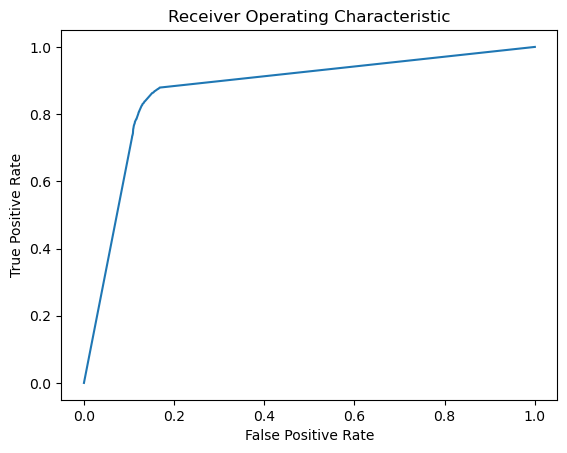

In [238]:
# Plot ROC Curve

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Decision Tree model - training and validation accuracy using kfold cross validation - 
                Training and Validation Accuracy - 83.78%
            2. Decision Tree model with kfold cross validation - Testing Accuracy - 85.36%
            3. Decision Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Random Forest Tree Classifier

In [221]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [222]:
kfold = KFold(n_splits = 5, shuffle = True)

In [223]:
random_clf = RandomForestClassifier()

In [224]:
scores2 = cross_val_score(random_clf, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores2

array([0.86208145, 0.8685735 , 0.88504707, 0.87056481, 0.86676322])

In [225]:
print(np.mean(scores2))

0.8706060071887052


In [226]:
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [236]:
# to check the confusion matrix

y_pred2 = random_clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[6070,  785],
       [ 636, 4347]], dtype=int64)

In [240]:
random_clf.score(x_test, y_test)

0.879962831559385

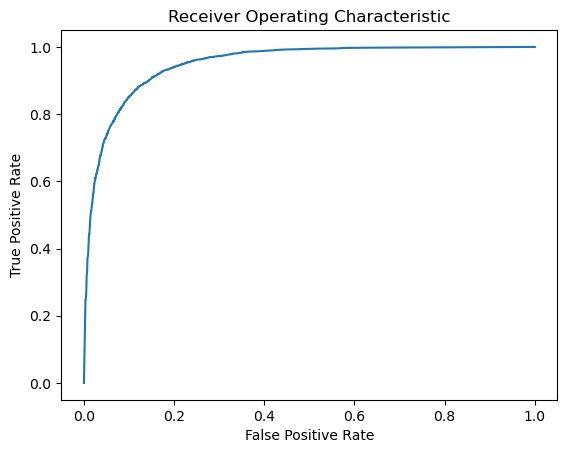

In [281]:
# Predicted probabilities
random_clf_y_test_prob = random_clf.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, random_clf_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Random Forest Tree - training and validation accuracy using kfold cross validation - 
                87.06%
            2. Random Forest Tree with kfold cross validation - Testing Accuracy - 87.99%
            3. Random Forest Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Extra Tree Classifier

In [242]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()

In [243]:
kfold = KFold(n_splits = 5, shuffle = True)

In [244]:
scores3 = cross_val_score(ETC, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores3

array([0.85484163, 0.86332368, 0.86314265, 0.86766836, 0.86640116])

In [248]:
print(np.mean(scores3))

0.8630754945101753


In [249]:
ETC.fit(x_train, y_train) 

ExtraTreesClassifier()

In [250]:
# to check the confusion matrix

y_pred3 = ETC.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[6065,  790],
       [ 703, 4280]], dtype=int64)

In [252]:
ETC.score(x_test, y_test)

0.8738807230951174

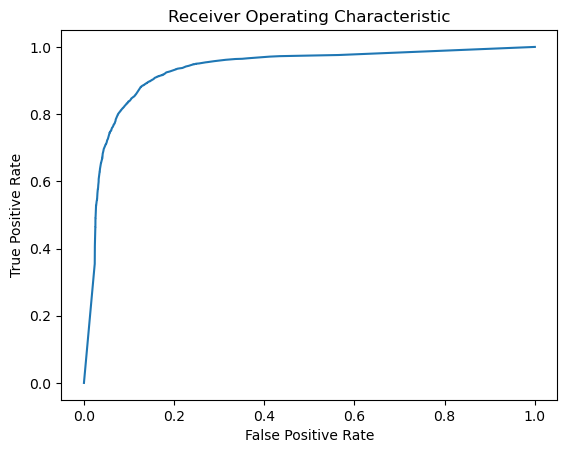

In [282]:
# Predicted probabilities
ETC_y_test_prob = ETC.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, ETC_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. Extra Tree Model - training and validation accuracy using kfold cross validation - 
                86.30%
            2. Extra Tree with kfold cross validation - Testing Accuracy - 87.38%
            3. Extra Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Logistic Regression Classifier

In [272]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y1, test_size = 0.30, random_state = 41)

In [273]:
LR = LogisticRegression()

In [274]:
kfold = KFold(n_splits = 5, shuffle = True)

In [275]:
scores4 = cross_val_score(LR, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores4

array([0.72850679, 0.73225923, 0.7320782 , 0.7346126 , 0.71741492])

In [276]:
print(np.mean(scores4))

0.7289743480525948


In [277]:
LR.fit(x_train1, y_train1) 

LogisticRegression()

In [278]:
# to check the confusion matrix

y_pred4 = LR.predict(x_test1)
cm4 = confusion_matrix(y_test1, y_pred4)
cm4

array([[5408, 1447],
       [1709, 3274]], dtype=int64)

In [279]:
LR.score(x_test1, y_test1)

0.7334009123162697

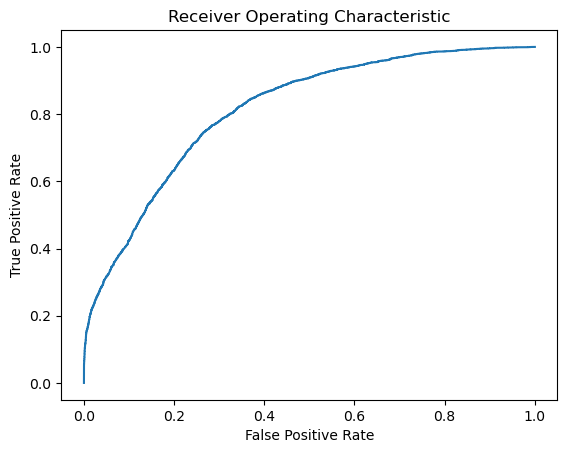

In [292]:
# Predicted probabilities
LR_y_test_prob = LR.predict_proba(x_test1)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test1, LR_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Logistic Regression model - training and validation accuracy using kfold cross 
               validation - 72.89%
            2. Logistic Regression with kfold cross validation - Testing Accuracy - 73.34%
            3. Logistic Regression model is neither overfitted nor underfitted
            4. As datasets are huge, we need to go for choosing complex model, as this Logistic 
                Regression is the simple model.

## KNN Classifier

In [284]:
kfold = KFold(n_splits = 5, shuffle = True)

In [285]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [286]:
scores5 = cross_val_score(knn, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores5

array([0.83511312, 0.8256698 , 0.83128168, 0.83091962, 0.82494569])

In [287]:
print(np.mean(scores5))

0.829585984318531


In [288]:
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [289]:
# to check the confusion matrix

y_pred5 = knn.predict(x_test1)
cm5 = confusion_matrix(y_test1, y_pred5)
cm5

array([[5694, 1161],
       [ 765, 4218]], dtype=int64)

In [290]:
knn.score(x_test1, y_test1)

0.8373035985808414

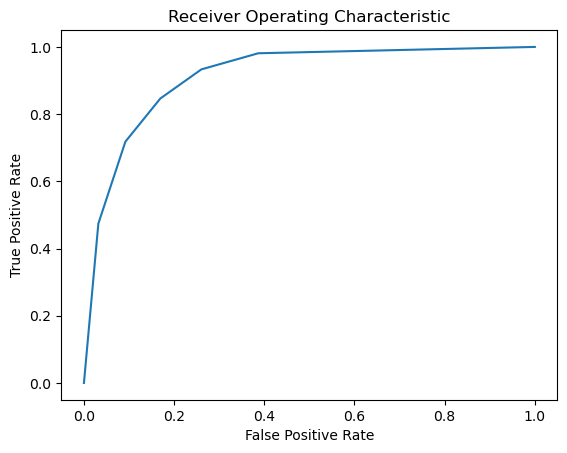

In [293]:
# Predicted probabilities
knn_y_test_prob = knn.predict_proba(x_test1)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test1, knn_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. KNN Classifier model - training and validation accuracy using kfold cross 
               validation - 82.95%
            2. KNN Classifier with kfold cross validation - Testing Accuracy - 83.73%
            3. KNN Classifier model is neither overfitted nor underfitted
            4. As datasets are huge, we need to go for choosing complex model.

## Gradient Boosting Classifier

In [305]:
from sklearn.ensemble import GradientBoostingClassifier

In [306]:
GB = GradientBoostingClassifier()

In [307]:
kfold = KFold(n_splits = 5, shuffle = True)

In [308]:
scores6 = cross_val_score(GB, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores6

array([0.8561086 , 0.85047067, 0.846126  , 0.85590152, 0.86097031])

In [309]:
print(np.mean(scores6))

0.8539154196742474


In [310]:
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [311]:
# to check the confusion matrix

y_pred6 = GB.predict(x_test)
cm6 = confusion_matrix(y_test, y_pred6)
cm6

array([[5922,  933],
       [ 793, 4190]], dtype=int64)

In [312]:
GB.score(x_test, y_test)

0.854198344314918

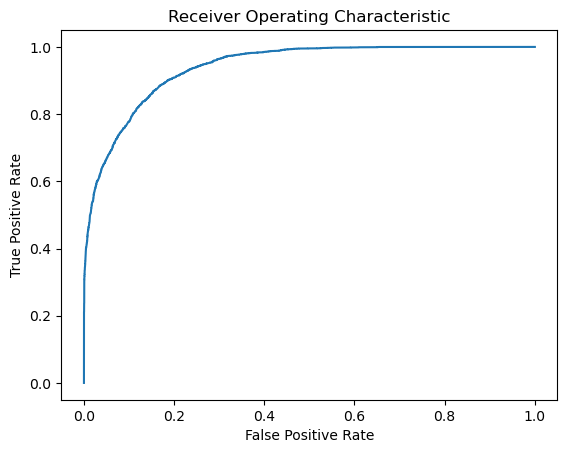

In [313]:
# Predicted probabilities
GB_y_test_prob = GB.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, GB_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. Gradient Boosting Classifier model - training and validation accuracy using kfold cross 
               validation - 85.39%
            2. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 85.41%
            3. Gradient Boosting Classifier model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## AdaBoost Classifier

In [314]:
from sklearn.ensemble import AdaBoostClassifier

In [315]:
ADA = AdaBoostClassifier()

In [316]:
kfold = KFold(n_splits = 5, shuffle = True)
scores7 = cross_val_score(ADA, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores7

array([0.84199095, 0.84594497, 0.8377987 , 0.84304852, 0.83472122])

In [317]:
print(np.mean(scores7))

0.8407008692632069


In [318]:
ADA.fit(x_train, y_train)

AdaBoostClassifier()

In [319]:
# to check the confusion matrix

y_pred7 = ADA.predict(x_test)
cm7 = confusion_matrix(y_test, y_pred7)
cm7

array([[5857,  998],
       [ 831, 4152]], dtype=int64)

In [320]:
ADA.score(x_test, y_test)

0.8454975502618686

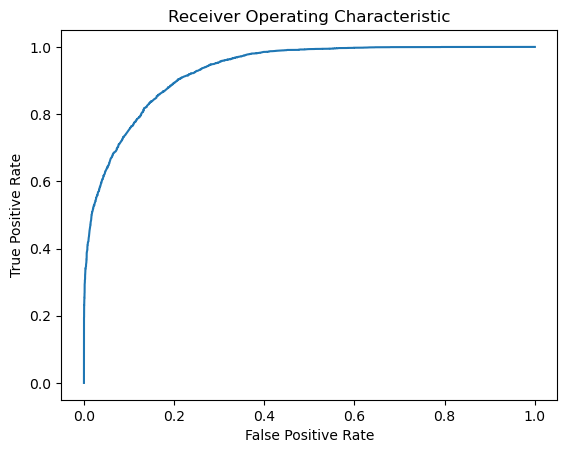

In [321]:
# Predicted probabilities
ADA_y_test_prob = ADA.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, ADA_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. AdaBoost Classifier model - training and validation accuracy using kfold cross 
               validation - 84.07%
            2. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 84.54%
            3. AdaBoost Classifier model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

In [ ]:
Final Observations: 
            1. Decision Tree model with kfold cross validation - 85.36%
            2. Random Forest Tree model with kfold cross validation - 87.99%
            3. Extra Tree model with kfold cross validation - 87.38%
            4. Logistic Regression model with kfold cross validation - 73.34%
            5. KNN Classifier model with kfold cross validation - 83.73%
            6. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 85.41%
            7. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 84.54%
            5. We can chose Random Forest Tree model for hyper tuning

## HyperParameter Tuning for Random Forest Tree model as its accuracy is better 87.99%

In [294]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [10, 50, 100, 1000], 'max_depth': [0, 10, 20, 25],
             'n_jobs': [-3, -2, -1, 1], 'n_estimators': [25, 50, 100, 200, 300]}


In [295]:
kfold = KFold(n_splits = 5, shuffle = True)

In [296]:
grid_search = GridSearchCV(estimator = random_clf, param_grid = parameters, scoring = 'accuracy', cv = kfold)

In [297]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 25],
                         'n_estimators': [25, 50, 100, 200, 300],
                         'n_jobs': [-3, -2, -1, 1],
                         'random_state': [10, 50, 100, 1000]},
             scoring='accuracy')

In [298]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'n_estimators': 300,
 'n_jobs': -3,
 'random_state': 10}

## Retrain the model with the hyperparameters

In [300]:
random_clf_final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 25, n_estimators = 300, n_jobs = -3,
 random_state = 10)

In [301]:
random_clf_final_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300,
                       n_jobs=-3, random_state=10)

In [302]:
grid_search.best_score_

0.8753483114406571

In [322]:
random_clf_final_model.score(x_test, y_test)

0.8816523061327927

In [ ]:
Observation:
            1. Random Forest Tree model with hypertuning - accuracy -  88.16%
            2. Random Forest Tree model without hypertuning - accuracy - 87.94%
            3. We will choose Random Forest Tree model with hypertuning for prediction of the data

## Save the Model

In [323]:
# use Random Forest Classifier and the save the model as it has good testing accuracy

import pickle
pickle.dump(random_clf_final_model, open('Census_Income_Model.pkl', 'wb'))

## prediction using the saved model

In [324]:
loaded_model = pickle.load(open('Census_Income_Model.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([0, 1, 1, ..., 1, 0, 1])

In [325]:
print(y_test)

6652     0
22754    1
4340     1
1458     0
11731    0
        ..
34531    1
7276     1
4532     1
21722    0
31238    1
Name: Income, Length: 11838, dtype: int32


In [326]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
11833,1,1
11834,1,1
11835,1,1
11836,0,0


Observation:
            1. Almost all actual and predicted values match
            2. This Census_Income_Model.pkl can be used to predict whether the a person makes over 
                $50K a year.

Observation:
            1. Decision Tree model with kfold cross validation - 85.36%
            2. Random Forest Tree model with kfold cross validation - 87.99%
            3. Extra Tree model with kfold cross validation - 87.38%
            4. Logistic Regression model with kfold cross validation - 73.34%
            5. KNN Classifier model with kfold cross validation - 83.73%
            6. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 85.41%
            7. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 84.54%            
            5. Random Forest Tree model with hypertuning - accuracy -  88.16%
            6. Comparing all the Classifiers - Random Forest Tree model with hypertuning has the
               good accuracy and our model is also free from overfitting/underfitting problem